# Dataset Information

This dataset contains **annotated vehicle license plate images** collected from diverse real-world environments, including streets, parking lots, traffic intersections, and highways.
Each image includes **bounding box annotations** following the YOLO format:

```
<class_id> <x_center> <y_center> <width> <height>
```

Since this is a **single-class detection task**, all annotation files contain:

```
0  → License Plate
```

###  Dataset Characteristics

* Contains images of **cars, motorcycles, buses, trucks**
* Captured under various **lighting and weather conditions**
* Includes challenging cases such as:

  * Motion blur
  * Nighttime visibility
  * Sun glare and reflections
  * Small, rotated, or partially occluded plates
* Suitable for **real-time license plate detection models**

###  Why This Dataset Matters

This dataset is designed for training and evaluating **Automatic Number Plate Recognition (ANPR)** systems.
It supports:

* Traffic surveillance
* Smart parking systems
* Toll booth automation
* Law enforcement applications
* Intelligent transportation systems

Its diversity makes it useful for developing models that **generalize well to real-world deployment**, instead of overfitting to clean laboratory images.


| Split       | Number of Images | Description                           |
| ----------- | ---------------- | ------------------------------------- |
| 🟢 Train    | **7057**         | Used to train the model (largest set) |
| 🔵 Validate | **2048**         | Used for tuning hyperparameters       |
| 🟠 Test     | **1020**         | Used to evaluate final performance    |


**Citation:**

Roboflow Universe Projects. (2025). *License Plate Recognition Dataset* [Open Source Dataset]. Roboflow Universe.  
Available at: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e  
Accessed: November 17, 2025.


# Data Download

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SwgvVj4W6ABZJbJVXoMv")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov12")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 100.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.


Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov12:: 100%|██████████| 20262/20262 [00:02<00:00, 7687.79it/s]


# YOLO Dataset Visualization (License Plate)

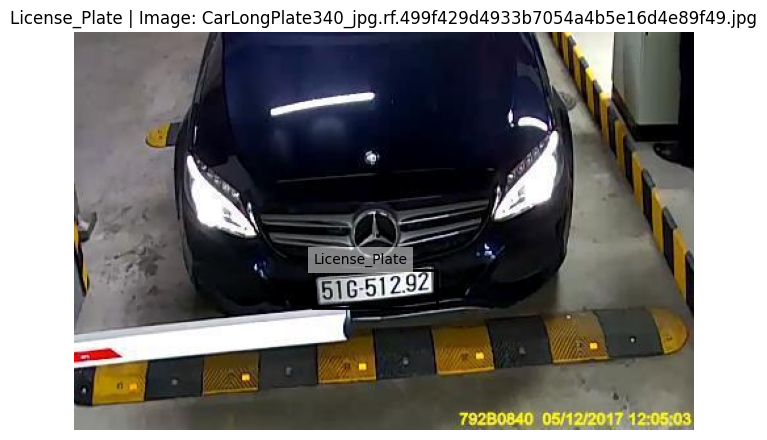

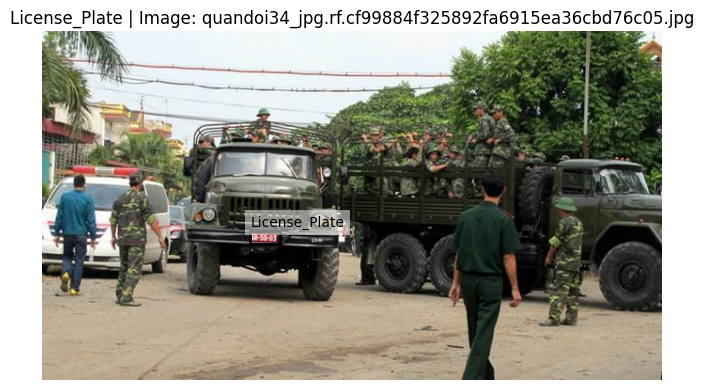

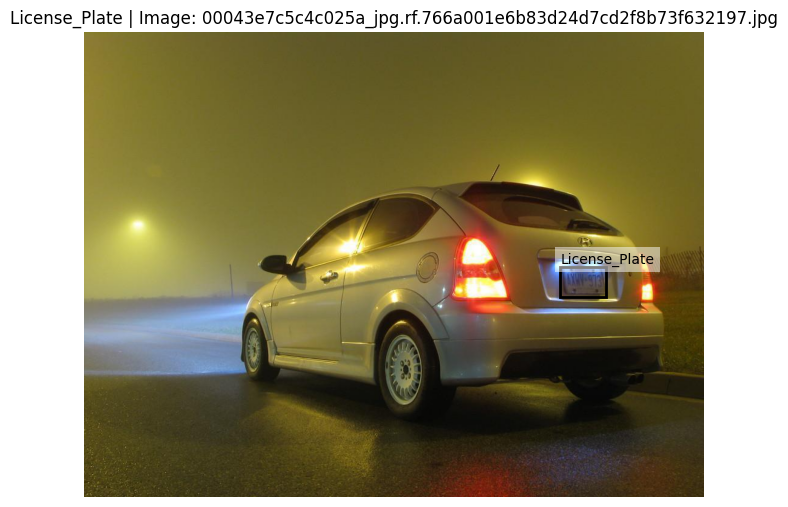

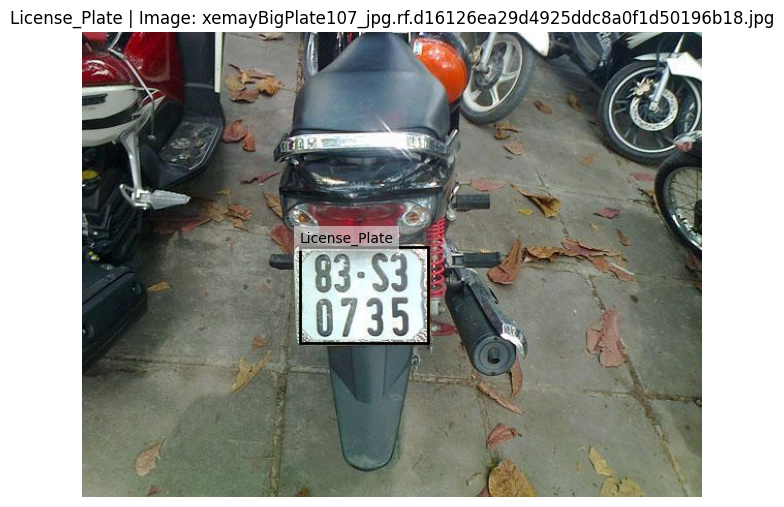

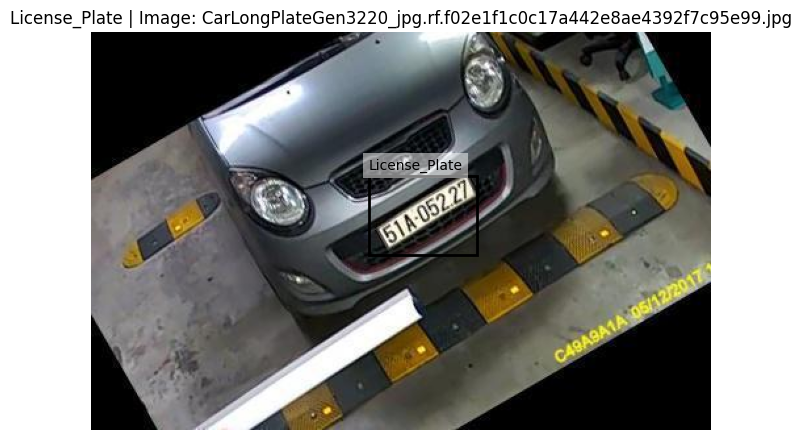

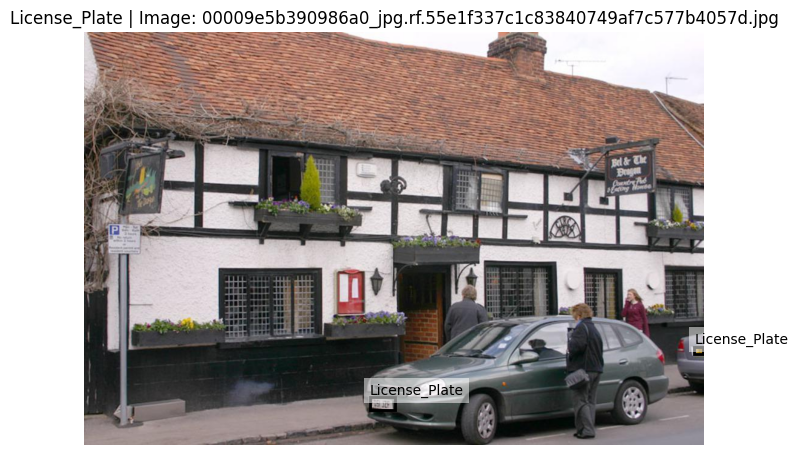

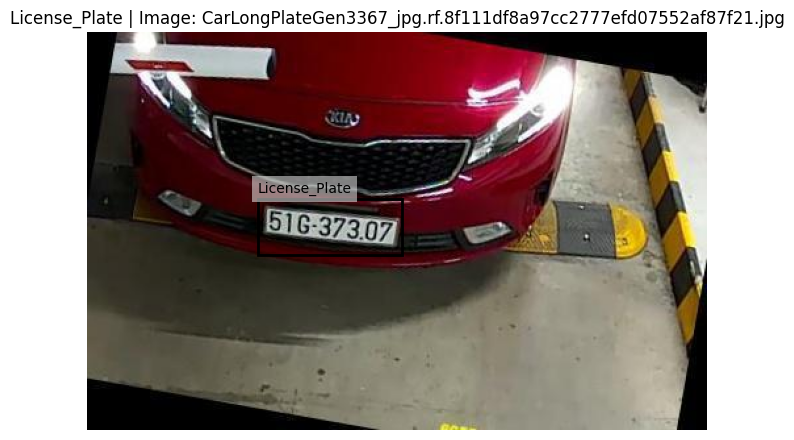

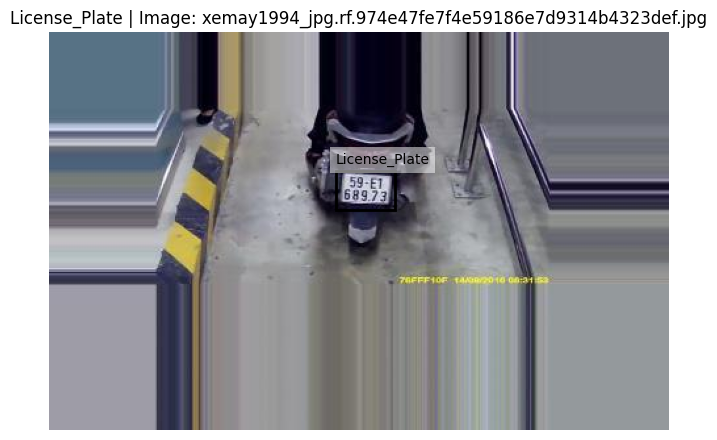

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_path = dataset.location  # Kaggle Dataset object

# Paths to images and labels
image_dir = os.path.join(dataset_path, 'train', 'images')
label_dir = os.path.join(dataset_path, 'train', 'labels')

# Get list of image files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# We only have 1 class: License_Plate (assumed class_id = 0)
target_class_id = 0

# How many images you want to visualize
num_images_to_visualize = 8

visualized_count = 0

for image_name in image_files:
    if visualized_count >= num_images_to_visualize:
        break

    image_path = os.path.join(image_dir, image_name)
    label_path = os.path.join(label_dir, os.path.splitext(image_name)[0] + '.txt')

    # Skip if there is no label file
    if not os.path.exists(label_path):
        continue

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        continue  # in case of a corrupt image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    height, width, _ = image.shape

    # Load bounding boxes for License_Plate (class 0)
    bboxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            # YOLO format: class_id cx cy w h  (all normalized 0–1)
            parts = line.strip().split()
            if len(parts) < 5:
                continue

            cls_id = int(float(parts[0]))
            if cls_id != target_class_id:
                continue

            center_x, center_y, bbox_width, bbox_height = map(float, parts[1:5])

            # Convert from normalized to absolute coordinates
            x_center = center_x * width
            y_center = center_y * height
            w = bbox_width * width
            h = bbox_height * height

            x_min = int(x_center - w / 2)
            y_min = int(y_center - h / 2)
            x_max = int(x_center + w / 2)
            y_max = int(y_center + h / 2)

            bboxes.append((x_min, y_min, x_max, y_max))

    # If no License_Plate bbox found in this image, skip it
    if not bboxes:
        continue

    # Visualize the image with all License_Plate bounding boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    ax = plt.gca()

    for (x_min, y_min, x_max, y_max) in bboxes:
        rect = plt.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            fill=False,
            linewidth=2
        )
        ax.add_patch(rect)
        # Optional: add label text
        ax.text(
            x_min,
            y_min - 5,
            "License_Plate",
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
        )

    plt.title(f"License_Plate | Image: {image_name}")
    plt.axis('off')
    plt.show()

    visualized_count += 1

if visualized_count == 0:
    print("No images with License_Plate labels found in the training set.")


# Install ultralytics 

In [3]:
!pip install ultralytics "numpy<2.0.0"

INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5

# Data Load

In [4]:
from ultralytics import YOLO
import cv2
import random
import yaml
import matplotlib.pyplot as plt
from pathlib import Path

# ------------------------------------------------------------
# 1️⃣ Load Dataset YAML
# ------------------------------------------------------------
yaml_path = Path("/kaggle/working/License-Plate-Recognition-11/data.yaml")

with open(yaml_path, "r") as f:
    data_cfg = yaml.safe_load(f)

print("✅ Dataset loaded successfully:")
print(yaml.dump(data_cfg, sort_keys=False))

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Dataset loaded successfully:
train: ../train/images
val: ../valid/images
test: ../test/images
nc: 1
names:
- License_Plate
roboflow:
  workspace: roboflow-universe-projects
  project: license-plate-recognition-rxg4e
  version: 11
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/11



# Train Model

In [5]:
model = YOLO("yolo12n.pt")  # pre-trained model

results = model.train(
    data=str(yaml_path),
    epochs=50,
    patience=10,
    imgsz=640,
    batch=110,
    project="/kaggle/working/license_plate_yolov12_train",
    name="yolov12_license_plate",
    device=[0, 1],
    workers=2,
    exist_ok=True,
    augment=True
)

print("\n✅ Training complete. Best model saved in:")

print('/kaggle/working/license_plate_yolov12_train/yolov12_license_plate/weights/best.pt')

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=110, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov12_license_plate, nbs=64, 

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2048       2195       0.98       0.94      0.972      0.707
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /kaggle/working/license_plate_yolov12_train/yolov12_license_plate

✅ Training complete. Best model saved in:
/kaggle/working/license_plate_yolov12_train/yolov12_license_plate/weights/best.pt


# Model Performance

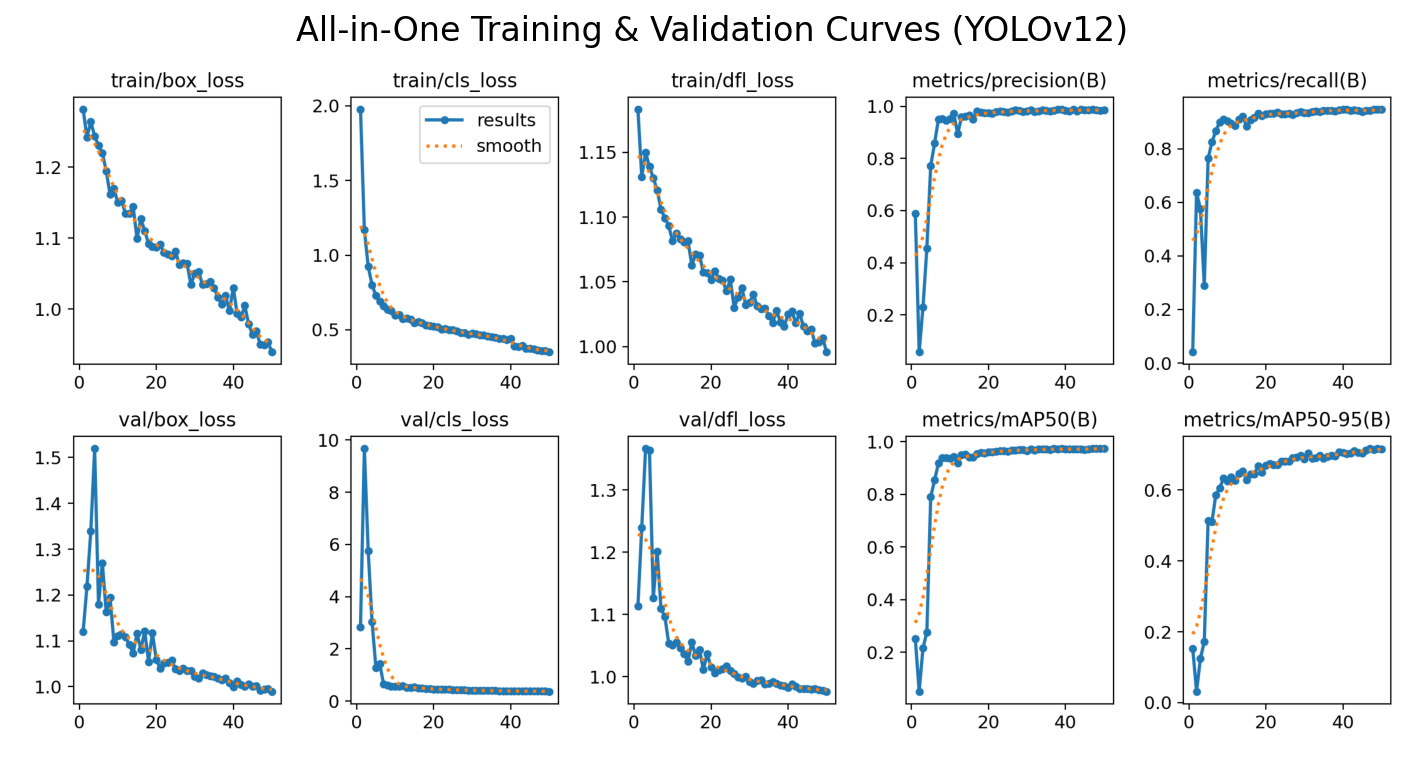

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from IPython.display import Image, display # Keep this for other cells, though not strictly needed here

# --- 1. Define your paths and title ---
results_dir = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate"
image_filename = "results.png"
image_path = os.path.join(results_dir, image_filename)

my_custom_title = "All-in-One Training & Validation Curves (YOLOv12)"

# --- 2. Load and display the image with a matplotlib title ---
try:
    # Load the .png file
    img = mpimg.imread(image_path)
    
    # Create a figure to plot on
    plt.figure(figsize=(12, 10),dpi=150)
    
    # Display the image
    plt.imshow(img)
    
    # Add your custom title
    plt.title(my_custom_title, fontsize=16)
    
    # Hide the pixel axes (the 0, 200, 400 numbers)
    plt.axis('off')
    
    # Show the final plot
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{image_filename}' in {results_dir}")
    print("Please make sure the 'results_dir' path is correct.")

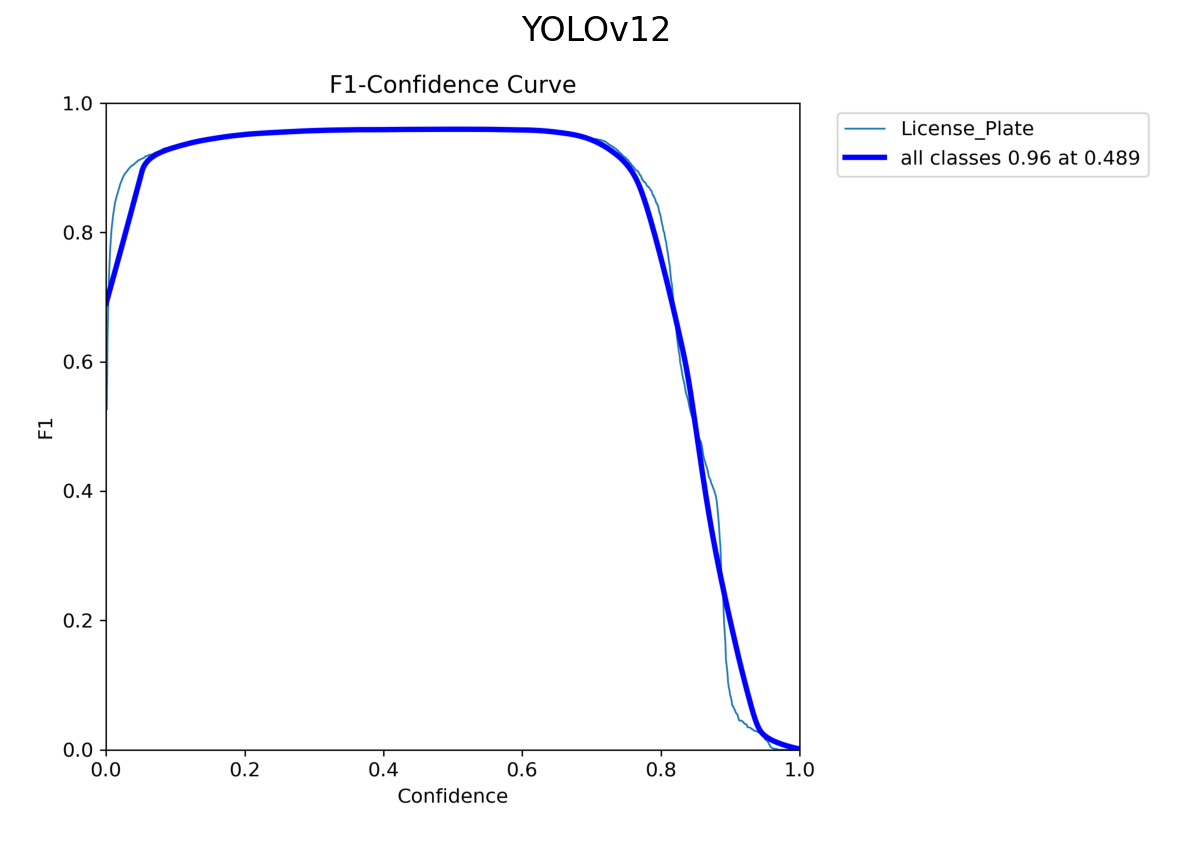

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- 1. Define your paths and title ---
results_dir = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate"
image_filename = "BoxF1_curve.png"
image_path = os.path.join(results_dir, image_filename)

my_custom_title = "YOLOv12"

# --- 2. Load and display the image with a matplotlib title ---
try:
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 8),dpi=150)
    plt.imshow(img)
    plt.title(my_custom_title, fontsize=16)
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{image_filename}' in {results_dir}")

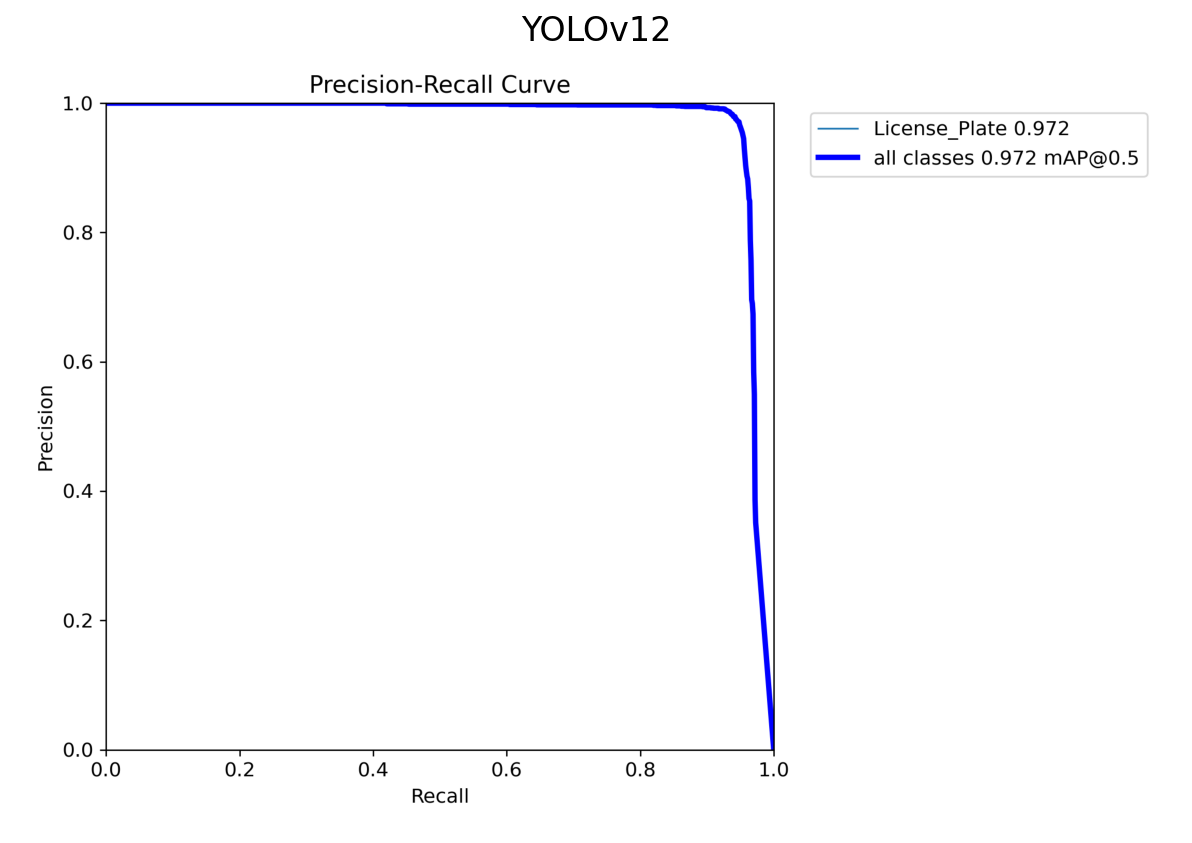

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- 1. Define your paths and title ---
results_dir = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate"
image_filename = "BoxPR_curve.png"
image_path = os.path.join(results_dir, image_filename)

my_custom_title = "YOLOv12"

# --- 2. Load and display the image with a title ---
try:
    # Load the .png file
    img = mpimg.imread(image_path)
    
    # Create a figure to plot on
    plt.figure(figsize=(10, 8),dpi=150)
    
    # Display the image
    plt.imshow(img)
    
    # Add your custom title
    plt.title(my_custom_title, fontsize=16)
    
    # Hide the pixel axes (the 0, 200, 400 numbers)
    plt.axis('off')
    
    # Show the final plot
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{image_filename}' in {results_dir}")

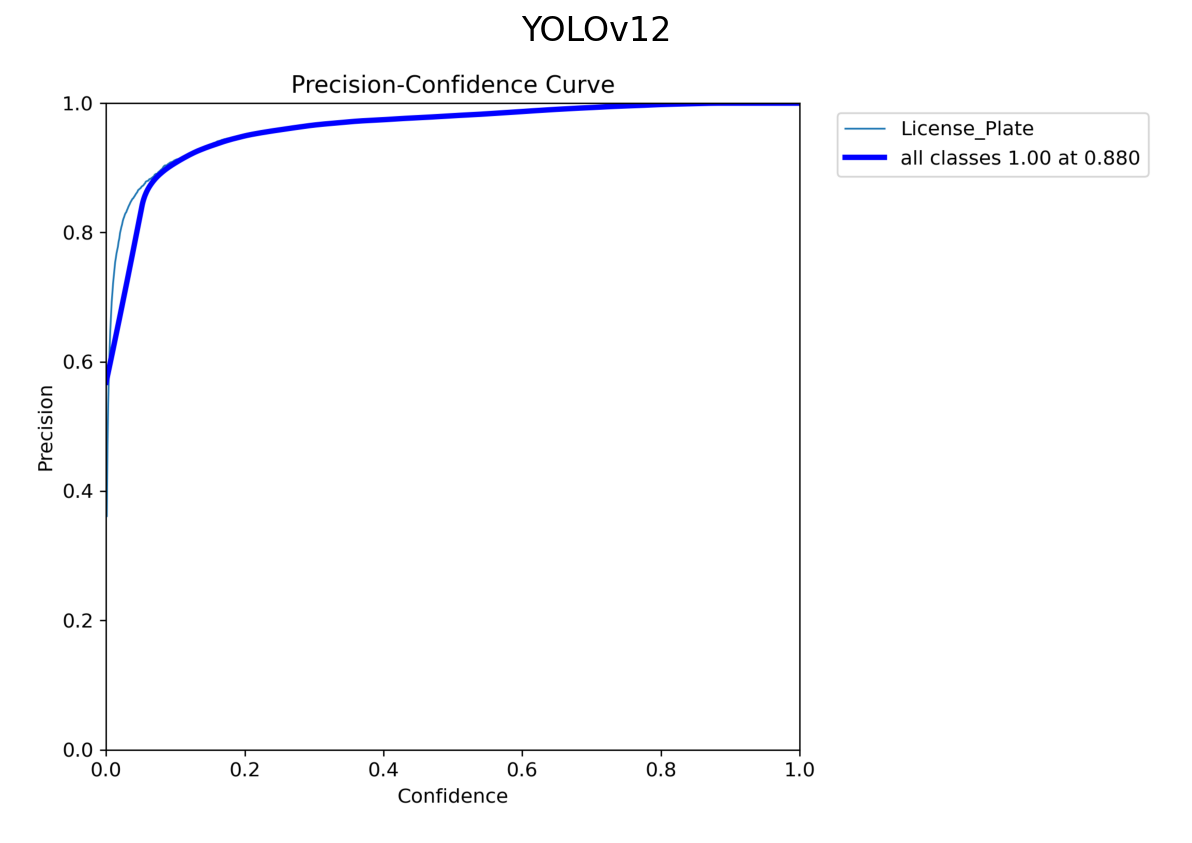

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- 1. Define your paths and title ---
results_dir = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate"
image_filename = "BoxP_curve.png"
image_path = os.path.join(results_dir, image_filename)

my_custom_title = "YOLOv12"

# --- 2. Load and display the image with a matplotlib title ---
try:
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 8),dpi=150)
    plt.imshow(img)
    plt.title(my_custom_title, fontsize=16)
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{image_filename}' in {results_dir}")

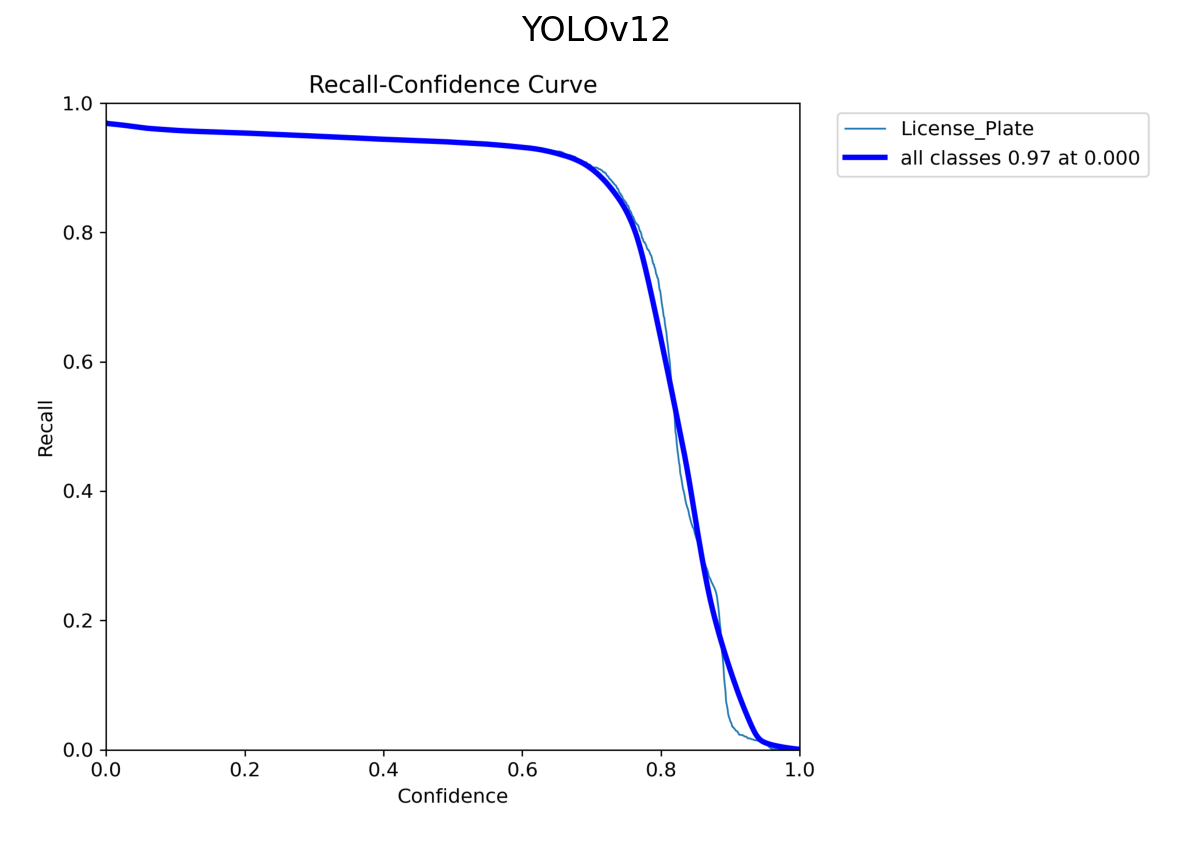

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- 1. Define your paths and title ---
results_dir = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate"
image_filename = "BoxR_curve.png"
image_path = os.path.join(results_dir, image_filename)

my_custom_title = "YOLOv12"

# --- 2. Load and display the image with a matplotlib title ---
try:
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 8),dpi=150)
    plt.imshow(img)
    plt.title(my_custom_title, fontsize=16)
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{image_filename}' in {results_dir}")

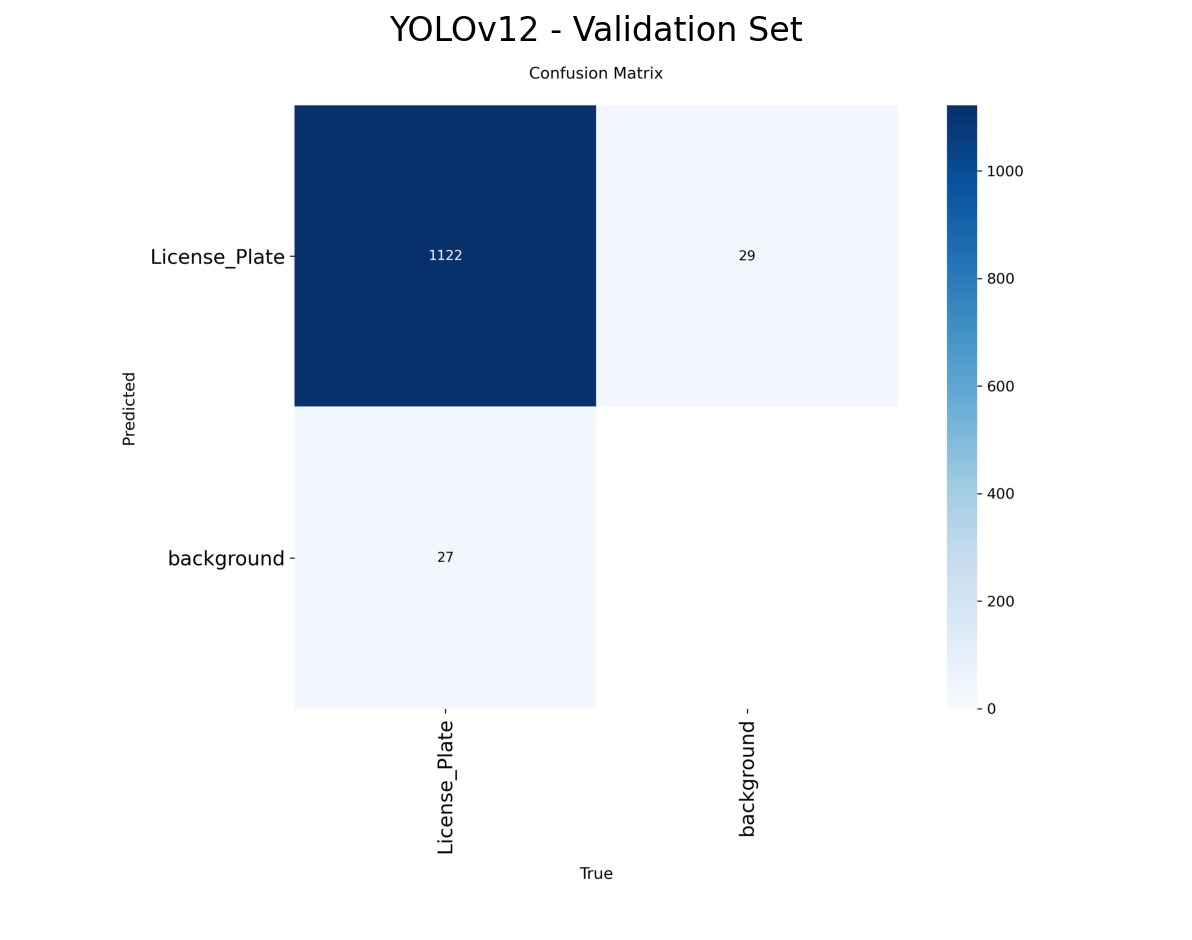

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- 1. Define your paths and title ---
results_dir = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate"
image_filename = "confusion_matrix.png"
image_path = os.path.join(results_dir, image_filename)


my_custom_title = "YOLOv12 - Validation Set"

# --- 2. Load and display the image with a matplotlib title ---
try:
    # Load the .png file
    img = mpimg.imread(image_path)
    
    # Create a figure to plot on 
    plt.figure(figsize=(10, 8),dpi=150)
    
    # Display the image
    plt.imshow(img)
    
    # Add your custom title
    plt.title(my_custom_title, fontsize=16)
    
    # Hide the pixel axes
    plt.axis('off')
    
    # Show the final plot
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{image_filename}' in {results_dir}")
    print("Please make sure the 'results_dir' path is correct.")

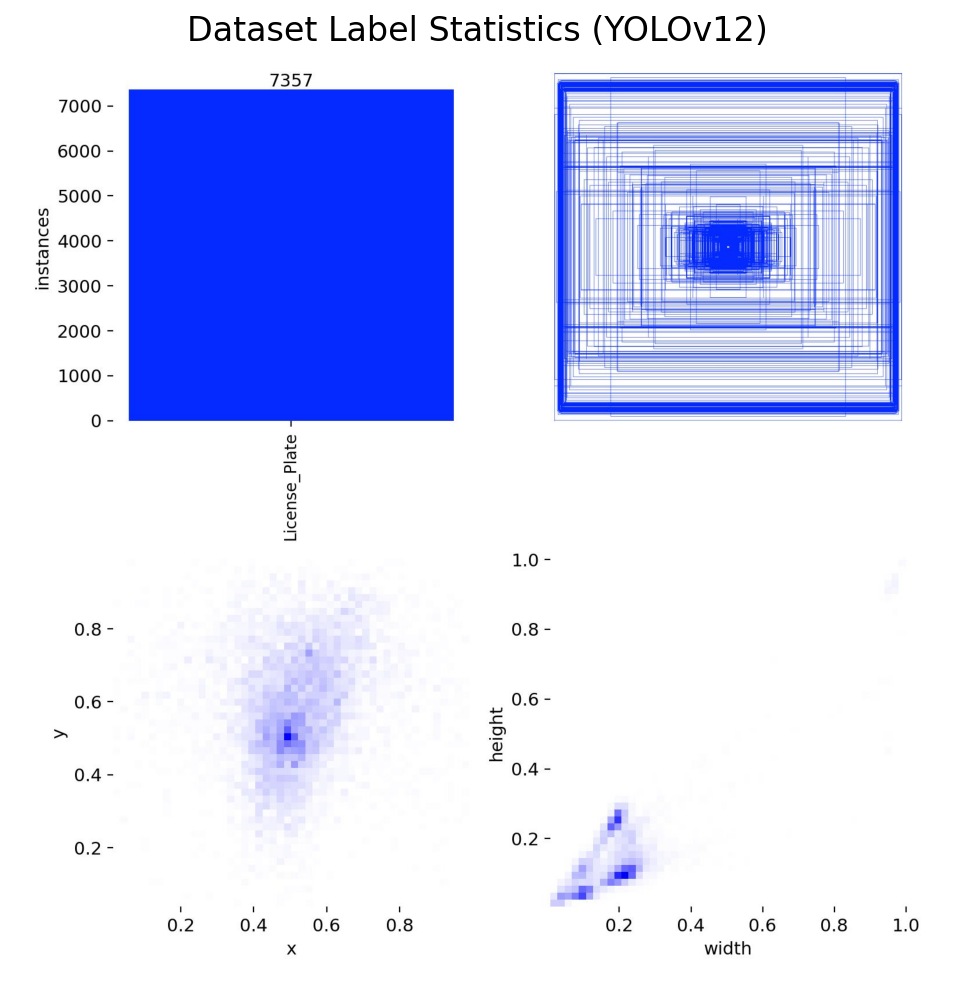

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- 1. Define your paths and title ---
results_dir = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate"
image_filename = "labels.jpg"
image_path = os.path.join(results_dir, image_filename)

my_custom_title = "Dataset Label Statistics (YOLOv12)"

# --- 2. Load and display the image with a matplotlib title ---
try:
    # Load the .png file
    img = mpimg.imread(image_path)
    
    # Create a figure to plot on (adjust figsize as needed)
    plt.figure(figsize=(10, 8),dpi=150)
    
    # Display the image
    plt.imshow(img)
    
    # Add your custom title
    plt.title(my_custom_title, fontsize=16)
    
    # Hide the pixel axes
    plt.axis('off')
    
    # Show the final plot
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{image_filename}' in {results_dir}")
    print("Please make sure the 'results_dir' path is correct.")

# Evaluation

🔁 Loading trained model from:
/kaggle/working/license_plate_yolov12_train/yolov12_license_plate/weights/best.pt

Using data yaml: /kaggle/working/License-Plate-Recognition-11/data.yaml

📊 Evaluating on VALIDATION set...
Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 704.9±211.7 MB/s, size: 18.6 KB)
val: Scanning /kaggle/working/License-Plate-Recognition-11/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2048/2048 4.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 8.3it/s 15.5s
                   all       2048       2195      0.983      0.947      0.974      0.718
Speed: 0.7ms preprocess, 3.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /kaggle/working/runs/detect/val

🔍 Validation metr

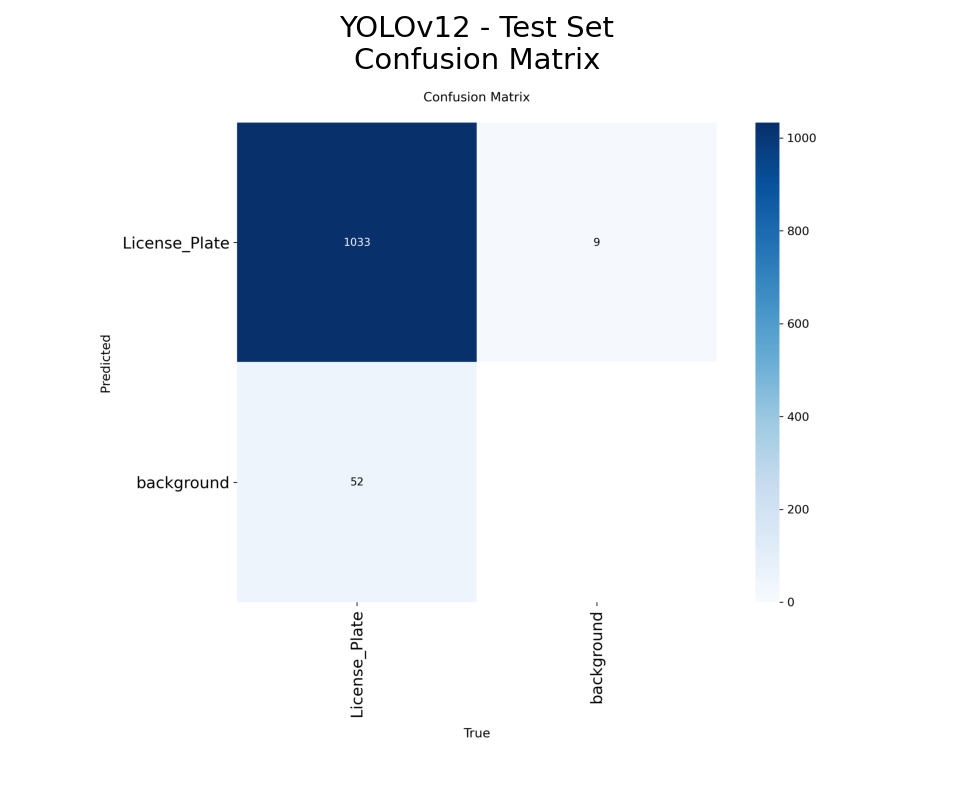

In [13]:
# ✅ Full evaluation cell for YOLOv12 license plate model

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO

# ------------------------------------------------------------
# 0️⃣ Load the CORRECT trained model (best.pt)
# ------------------------------------------------------------
best_model_path = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate/weights/best.pt"
print(f"🔁 Loading trained model from:\n{best_model_path}\n")

model = YOLO(best_model_path)

# yaml_path should already be defined earlier in your notebook
print(f"Using data yaml: {yaml_path}\n")

# ------------------------------------------------------------
# 1️⃣ Validation Set Evaluation
# ------------------------------------------------------------
print("📊 Evaluating on VALIDATION set...")
with np.errstate(invalid='ignore'):
    val_metrics = model.val(data=str(yaml_path), split="val")

# Basic metrics
val_p  = float(val_metrics.box.p.mean())
val_r  = float(val_metrics.box.r.mean())
val_map50 = float(val_metrics.box.map50.mean())
val_map5095 = float(val_metrics.box.map.mean())
val_f1 = float(val_metrics.box.f1.mean())

print("\n🔍 Validation metrics (mean over classes):")
print(f"  Precision:  {val_p:.4f}")
print(f"  Recall:     {val_r:.4f}")
print(f"  mAP@0.50:   {val_map50:.4f}")
print(f"  mAP@0.50:0.95: {val_map5095:.4f}")
print(f"  F1-score:   {val_f1:.4f}")
print("-" * 40)

# ------------------------------------------------------------
# 2️⃣ Test Set Evaluation
# ------------------------------------------------------------
print("\n📊 Evaluating on TEST set...")
with np.errstate(invalid='ignore'):
    test_metrics = model.val(data=str(yaml_path), split="test")

test_p  = float(test_metrics.box.p.mean())
test_r  = float(test_metrics.box.r.mean())
test_map50 = float(test_metrics.box.map50.mean())
test_map5095 = float(test_metrics.box.map.mean())
test_f1 = float(test_metrics.box.f1.mean())

print("\n🔍 Test metrics (mean over classes):")
print(f"  Precision:  {test_p:.4f}")
print(f"  Recall:     {test_r:.4f}")
print(f"  mAP@0.50:   {test_map50:.4f}")
print(f"  mAP@0.50:0.95: {test_map5095:.4f}")
print(f"  F1-score:   {test_f1:.4f}")
print("-" * 40)

# ------------------------------------------------------------
# 3️⃣ Confusion Matrix from the SAME Test Run
# ------------------------------------------------------------
try:
    results_dir = test_metrics.save_dir       # ultralytics run folder (e.g., runs/detect/val2)
    cm_filename = "confusion_matrix.png"
    cm_path = os.path.join(results_dir, cm_filename)

    print(f"\n🖼 Loading confusion matrix from:\n{cm_path}\n")
    img = mpimg.imread(cm_path)

    plt.figure(figsize=(8, 6), dpi=150)
    plt.imshow(img)
    plt.title("YOLOv12 - Test Set\nConfusion Matrix", fontsize=14)
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"❌ Could not find '{cm_filename}' in {results_dir}")

# ------------------------------------------------------------
# 4️⃣ (Optional) Visualize some test predictions
# ------------------------------------------------------------
# Uncomment if you want to inspect a few predicted images:
# preds = model.predict(
#     source="/kaggle/working/License-Plate-Recognition-11/test/images",
#     save=True,
#     max_det=5,
#     conf=0.25
# )
# print(f"Predictions saved to: {preds[0].save_dir if len(preds) else 'N/A'}")


# XAI

📸 Running prediction on 10 random test images...

0: 640x640 1 License_Plate, 7.3ms
1: 640x640 1 License_Plate, 7.3ms
2: 640x640 1 License_Plate, 7.3ms
3: 640x640 1 License_Plate, 7.3ms
4: 640x640 1 License_Plate, 7.3ms
5: 640x640 1 License_Plate, 7.3ms
6: 640x640 1 License_Plate, 7.3ms
7: 640x640 1 License_Plate, 7.3ms
8: 640x640 1 License_Plate, 7.3ms
9: 640x640 1 License_Plate, 7.3ms
Speed: 2.5ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


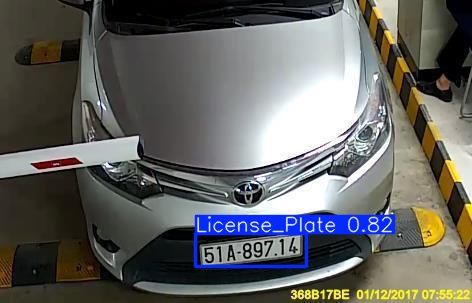

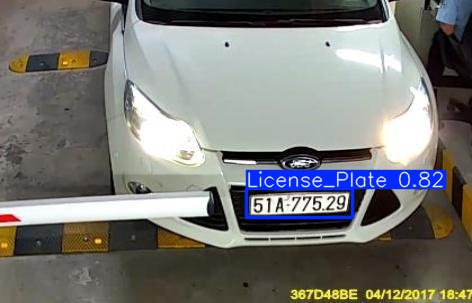

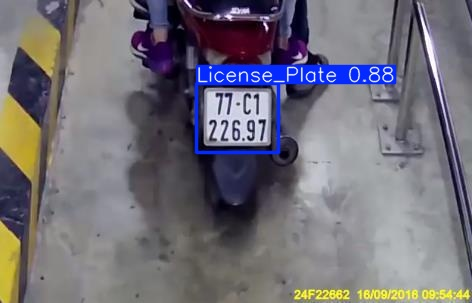

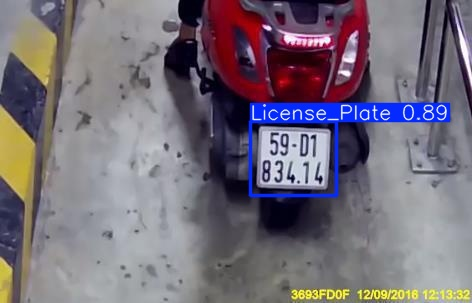

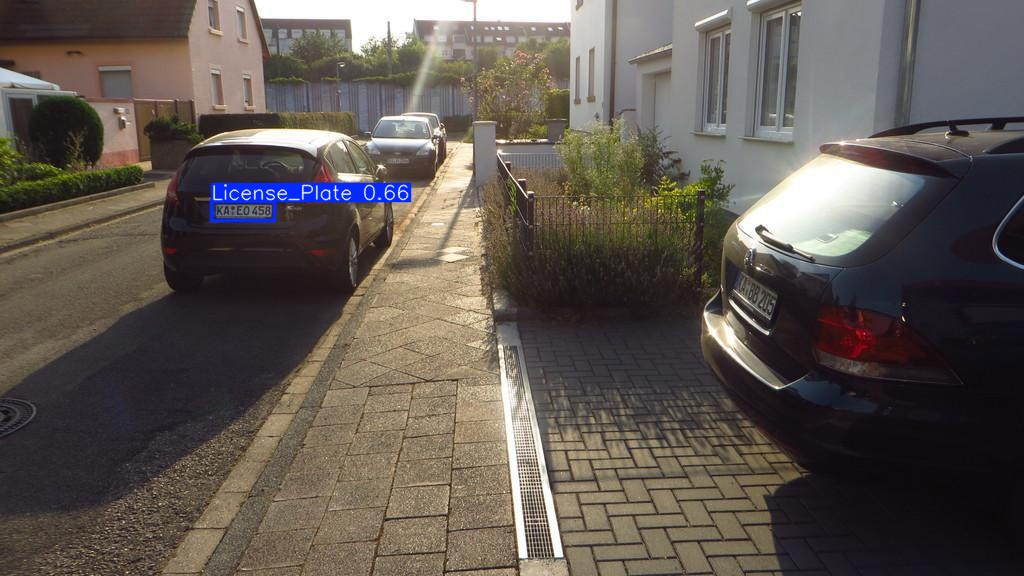

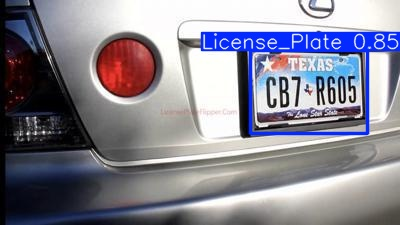

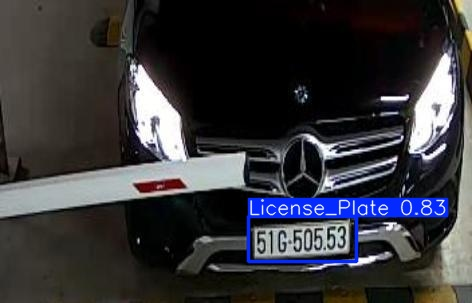

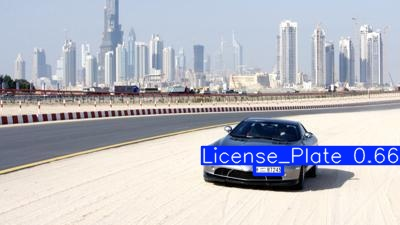

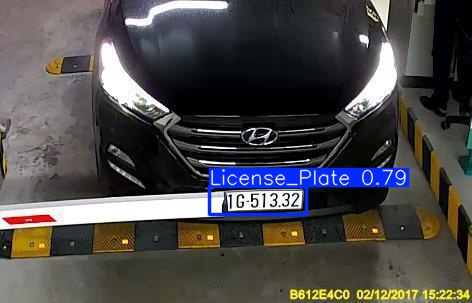

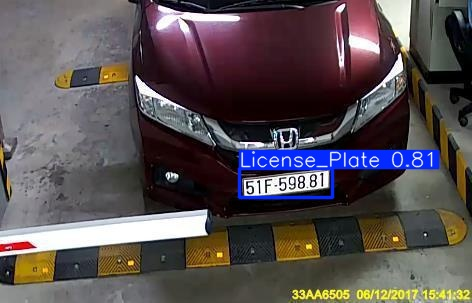

In [14]:
from ultralytics import YOLO
from pathlib import Path
import random
import glob
from IPython.display import Image, display

# -----------------------------------------------------------------
# 1. Load your *best* trained model
# -----------------------------------------------------------------
# This path *must* point to your 'best.pt' file
model_path = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate/weights/best.pt"
model = YOLO(model_path)

# -----------------------------------------------------------------
# 2. Find your test images
# -----------------------------------------------------------------
# Path to your 'test' images folder (update if needed)
test_images_dir = "/kaggle/working/License-Plate-Recognition-11/test/images"

# Get a list of all .jpg images in that folder
test_image_paths = glob.glob(f"{test_images_dir}/*.jpg")

# -----------------------------------------------------------------
# 3. Predict on 10 random images
# -----------------------------------------------------------------
if test_image_paths:
    # Pick 10 random images from the list
    images_to_predict = random.sample(test_image_paths, 10)

    print(f"📸 Running prediction on {len(images_to_predict)} random test images...")

    # Run prediction
    results = model.predict(images_to_predict, conf=0.5) # conf=0.5 means only show boxes with > 50% confidence

    # -----------------------------------------------------------------
    # 4. Display the results
    # -----------------------------------------------------------------
    for r in results:
        # The 'plot()' method draws the boxes on the image
        img_with_boxes = r.plot() 
        
        # Display the image in the notebook
        display(Image(data=cv2.imencode('.jpg', img_with_boxes)[1].tobytes()))
else:
    print(f"Error: No .jpg images found in {test_images_dir}")
    print("Please check the 'test_images_dir' path.")

In [15]:
# This will ensure numpy 1.x is installed
!pip install "numpy<2.0.0"

# This is the correct package name for the library
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=8a5b17e3fd530f144a57c962d14f2331b47e062fba1c56a1ffab66f0030d30ec
  Stored in directory: /root/.cache/pip/wheels/bc/52/78/893c3b94279ef238f43a9e89608af648de401b96415bebbd1f
Successfully built grad-cam


Loading model...
Generating heatmaps for 10 images...

Results for: CarLongPlateGen2197_jpg.rf.3f17fb6264081fc28740994531642c4e.jpg


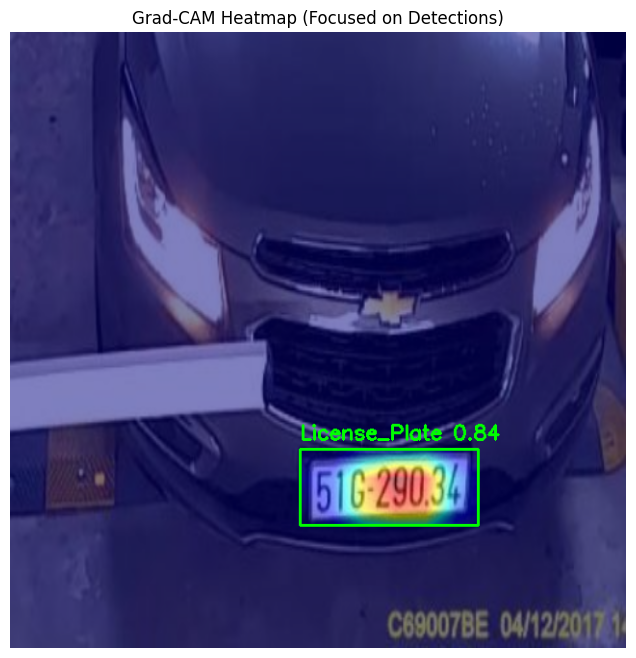


Results for: xemay1853_jpg.rf.f65e3210da28ede6b19d2d15d66142b1.jpg


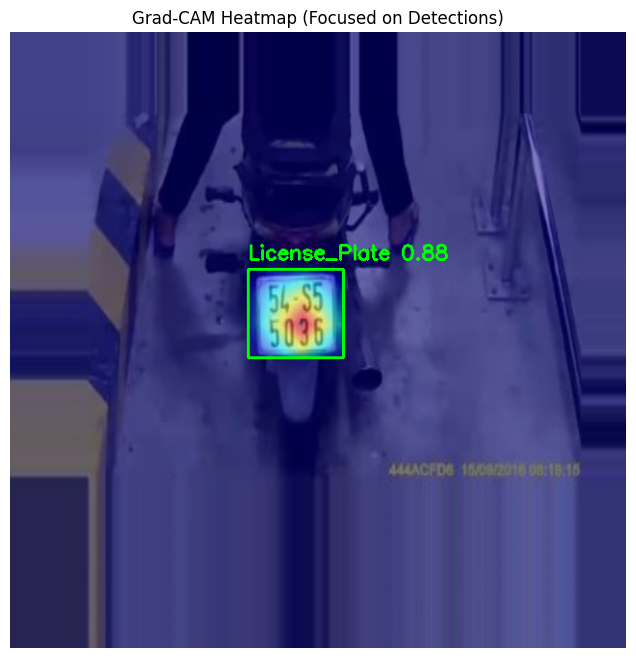


Results for: CarLongPlate559_jpg.rf.9a872c09f085b1bc247dcae4958f4051.jpg


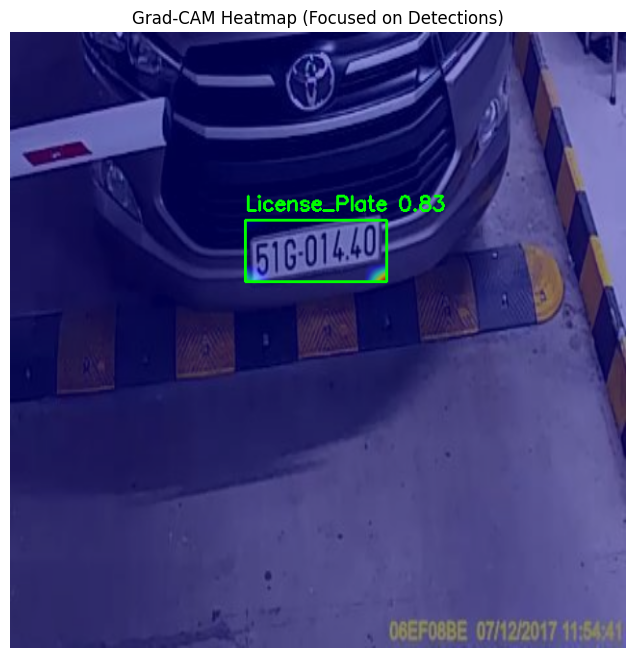


Results for: CarLongPlateGen30_jpg.rf.7e94f8cc23ba07f9a36e77d7b4f93787.jpg


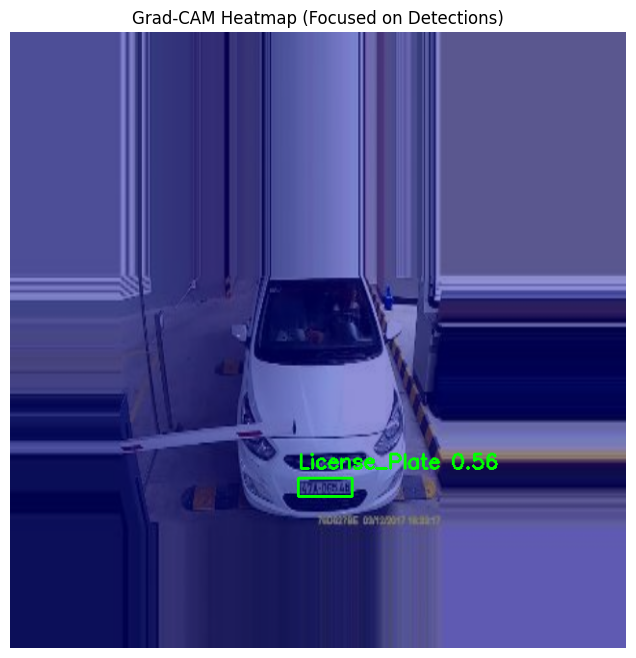


Results for: xemay1219_jpg.rf.e5bb93854f2fd6584e9810eaeff20ec2.jpg


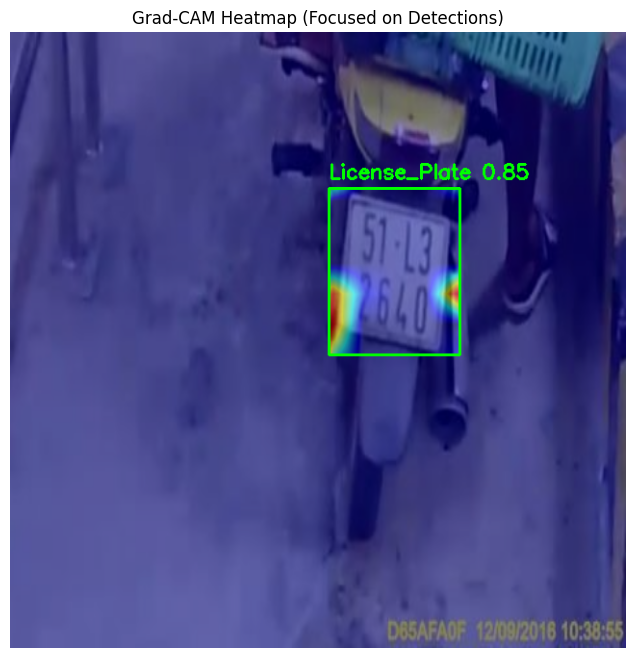


Results for: CarLongPlateGen2834_jpg.rf.c422b114d9b95805e39c67f8612e30e1.jpg


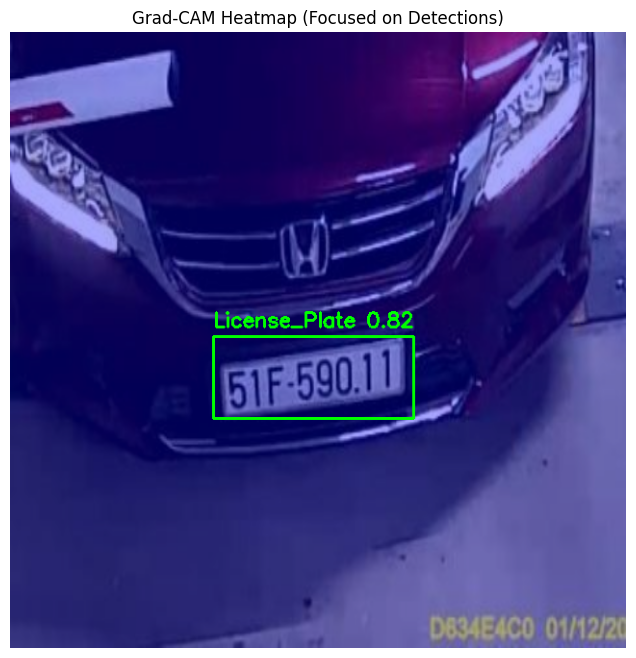


Results for: CarLongPlateGen267_jpg.rf.c2136954963f74cef576be0f3b47407a.jpg


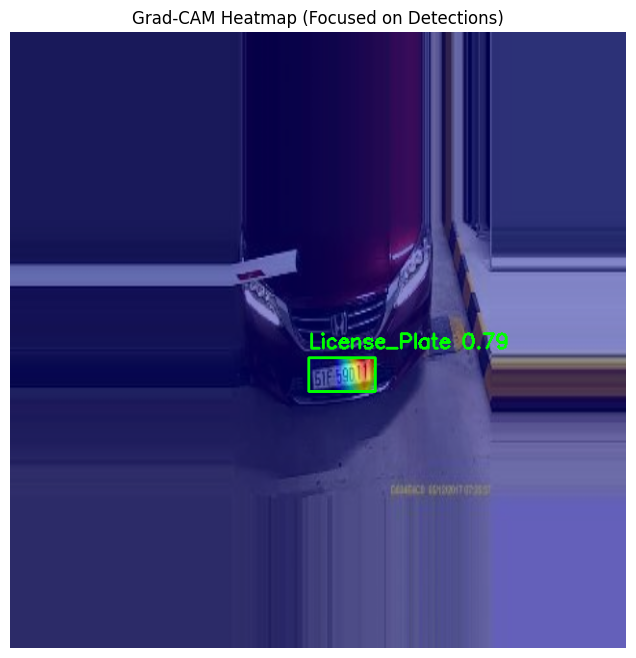


Results for: CarLongPlateGen1053_jpg.rf.146a85f8f1a1b9f3a3c8776536eb39c4.jpg


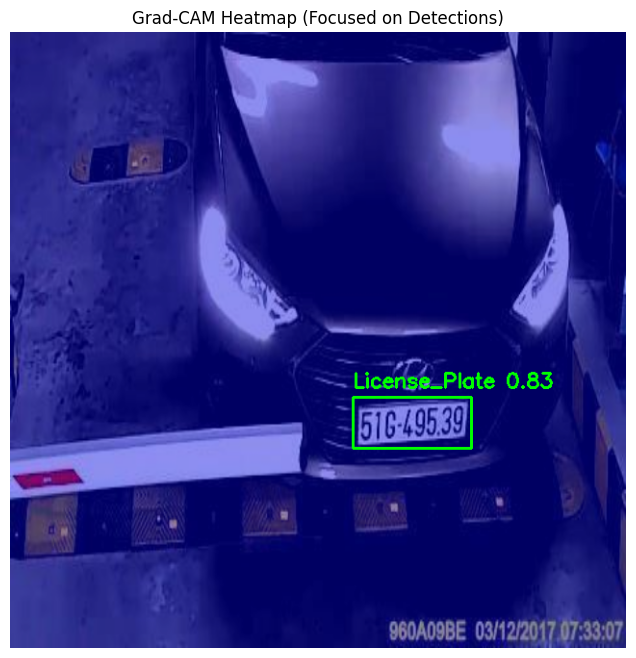


Results for: CarLongPlate161_jpg.rf.1926166fd6d384eda07c159efa222b3c.jpg


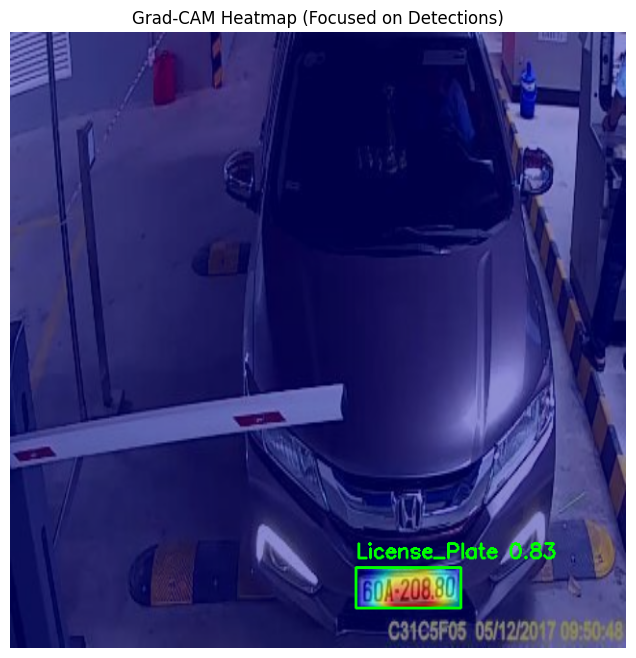


Results for: CarLongPlateGen1175_jpg.rf.23979947eb44d96d1acd1b58b3fe89d1.jpg


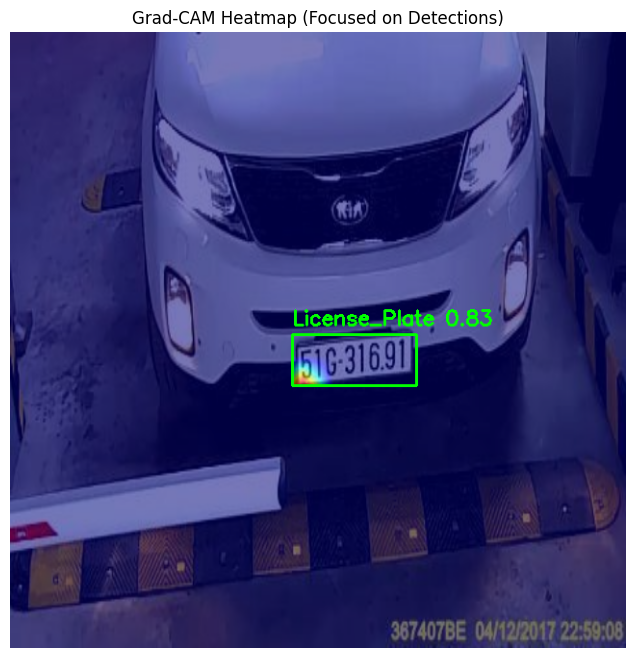

In [16]:
import cv2
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from ultralytics import YOLO
# This import will now work because 'grad-cam' is installed
from pytorch_grad_cam import EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import glob
import random
from PIL import Image
import os

# -----------------------------------------------
# ❗️ NEW: The Model Wrapper to fix the 'tuple' error ❗️
# -----------------------------------------------
class ModelWrapper(nn.Module):
    """
    This wrapper fixes the 'tuple' output error.
    It runs the model and returns only the first output (the detection tensor),
    which is what pytorch-grad-cam expects.
    """
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        # The model(x) call returns a tuple
        # We return only the first element
        return self.model(x)[0]

# --- Helper Functions (unchanged) ---

def renormalize_cam_in_bounding_boxes(boxes, image_float_np, grayscale_cam):
    """
    Normalizes the CAM to be in the range [0, 1] inside every bounding box,
    and 0 outside of the bounding boxes.
    """
    renormalized_cam = np.zeros(grayscale_cam.shape, dtype=np.float32)
    if boxes.ndim == 1:
        boxes = np.expand_dims(boxes, 0)
    if boxes.shape[0] == 0:
        return renormalized_cam
    for x1, y1, x2, y2 in boxes:
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(grayscale_cam.shape[1] - 1, x2)
        y2 = min(grayscale_cam.shape[0] - 1, y2)
        cam_slice = grayscale_cam[y1:y2, x1:x2]
        if not cam_slice.size > 0 or cam_slice.max() == cam_slice.min():
            continue
        cam_slice_normalized = (cam_slice - np.min(cam_slice)) / (np.max(cam_slice) - np.min(cam_slice))
        renormalized_cam[y1:y2, x1:x2] = cam_slice_normalized
    return renormalized_cam

def draw_detections(boxes, image_with_heatmap, class_names, confidences):
    """Draws bounding boxes and labels on the heatmap image."""
    for box, cls, conf in zip(boxes, class_names, confidences):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_with_heatmap, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"{cls} {conf:.2f}"
        cv2.putText(image_with_heatmap, label, (x1, y1 - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    return image_with_heatmap

# -----------------------------------------------
# MAIN HEATMAP GENERATION
# -----------------------------------------------

print("Loading model...")
# 1. Load your *best* trained model
model_path = "/kaggle/working/license_plate_yolov12_train/yolov12_license_plate/weights/best.pt"
model = YOLO(model_path)
model.model.eval() # Set model to evaluation mode

# 2. Select the target layer(s) and wrap the model
# We wrap the raw PyTorch model
model_to_cam = ModelWrapper(model.model)
# We target the layer *inside* the wrapper
target_layers = [model.model.model[-4]] 

# 3. Get 10 random test images
test_images_dir = "/kaggle/working/License-Plate-Recognition-11/test/images"
test_image_paths = glob.glob(f"{test_images_dir}/*.jpg")
if len(test_image_paths) >= 10:
    images_to_predict = random.sample(test_image_paths, 10)
else:
    images_to_predict = test_image_paths # Use all if less than 10

print(f"Generating heatmaps for {len(images_to_predict)} images...")

# 4. Loop through images and generate correct heatmaps
for image_path in images_to_predict:
    # --- Load and prepare the image ---
    im0 = cv2.imread(image_path)
    if im0 is None:
        print(f"Warning: Could not read {image_path}, skipping.")
        continue
        
    im0 = cv2.resize(im0, (640, 640))
    rgb_img = cv2.cvtColor(im0, cv2.COLOR_BGR2RGB)
    img_float = np.float32(rgb_img) / 255 # Normalize for heatmap
    
    # Prepare tensor for the model
    input_tensor = torch.from_numpy(np.transpose(img_float, (2, 0, 1))).unsqueeze(0).float()
    input_tensor = input_tensor.to(model.device) # Send to GPU/CPU

    # --- FIRST: Get the model's actual predictions (using the original model) ---
    results = model.predict(rgb_img, conf=0.5, verbose=False)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    class_names = [model.names[int(cls)] for cls in results[0].boxes.cls]
    confidences = results[0].boxes.conf.cpu().numpy()

    if len(boxes) == 0:
        print(f"\nNo detections found for: {os.path.basename(image_path)}. Skipping heatmap.")
        continue

    # --- SECOND: Initialize EigenCAM with the WRAPPED model ---
    cam = EigenCAM(model=model_to_cam, target_layers=target_layers)
    
    # --- THIRD: Generate the "global" heatmap ---
    grayscale_cam = cam(input_tensor=input_tensor, targets=None)[0, :] 
    
    # --- FOURTH: Renormalize CAM *inside* the boxes ---
    renormalized_cam = renormalize_cam_in_bounding_boxes(boxes, img_float, grayscale_cam)
    
    # --- FIFTH: Visualize the result ---
    cam_image = show_cam_on_image(img_float, renormalized_cam, use_rgb=True)
    cam_image_with_boxes = draw_detections(boxes, cam_image, class_names, confidences)
    
    print(f"\nResults for: {os.path.basename(image_path)}")
    plt.figure(figsize=(8, 8))
    plt.imshow(cam_image_with_boxes)
    plt.title("Grad-CAM Heatmap (Focused on Detections)")
    plt.axis('off')
    plt.show()